In [1]:
# %%capture

# !pip install layoutparser

# !pip install "layoutparser[effdet]"

# !pip install "layoutparser[paddledetection]"

# !pip install "layoutparser[ocr]"

# !sudo apt-get install poppler-utils -y

# !pip install layoutparser torchvision && pip install "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

In [8]:
# !pip uninstall PIL -y
# !pip uninstall Pillow -y
# !pip install Pillow

In [3]:
from pdf2image import convert_from_path, convert_from_bytes
from PIL import Image
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import layoutparser as lp
import os
%matplotlib inline

**Converting PDF to Image**

In [4]:
images = convert_from_bytes(open("doc 2.pdf", 'rb').read())

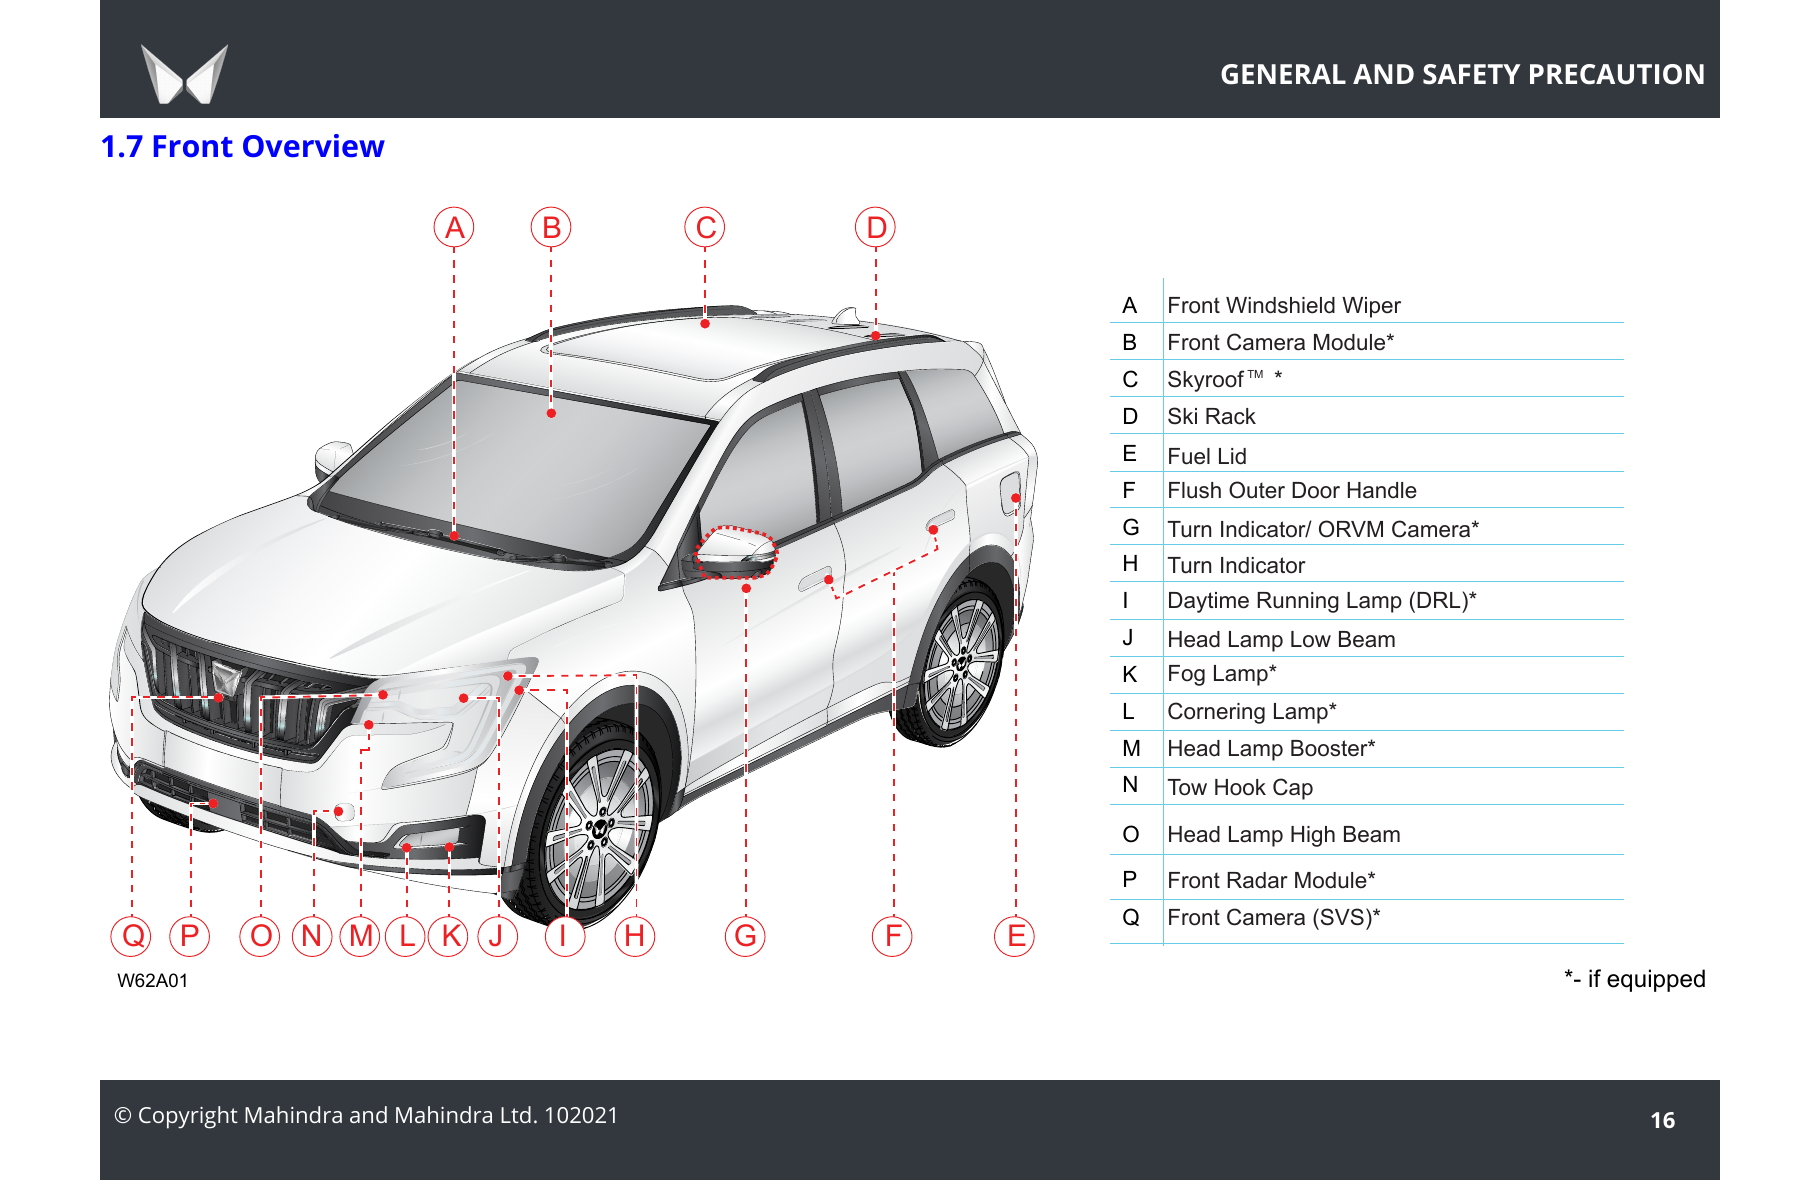

In [5]:
images[1]

**Loading Model**

In [12]:
from layoutparser.models import Detectron2LayoutModel

In [9]:
model = lp.models.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List",
                                 3:"Table",4:"Figure"})

OSError: [Errno 22] Invalid argument: 'C:\\Users\\TarunKumarChaubey/.torch/iopath_cache\\s/nau5ut6zgthunil\\config.yaml?dl=1.lock'

**Define Color Map For Detection Class**

In [ ]:
color_map = {
    'text':   'red',
    'title':  'blue',
    'list':   'green',
    'table':  'purple',
    'figure': 'pink',
}

**Testing Code**

In [ ]:
ind = 99
image = images[ind]
layout_predicted = model.detect(image)
lp.draw_box(image, layout_predicted, box_width=3)

In [ ]:
ind = 88
image = images[ind]
layout_predicted = model.detect(image)

In [ ]:
for docs in layout_predicted:
    if docs.type.lower() == 'text':
        print(docs.type)

**Detection &Plottting Results of Detection**

In [ ]:
ind = 100
image = images[ind]
layout_predicted = model.detect(image)
lp.draw_box(image,[b.set(id=f'{b.type}/{b.score:.2f}') for b in layout_predicted],
      color_map=color_map,
      show_element_id=True, id_font_size=10,
      id_text_background_color='grey',
      id_text_color='white')

**Extracting Text, Image Table From PDFImage**

In this case detectiong each image for three times like ones for Extract Image , then for Table and text

In [ ]:
# %reset

In [ ]:
# from layoutparser import Document, TextBlock, FigureBlock, Rectangle,Layout
# from layoutparser.utils import RectLoader
from pdf2image import convert_from_path, convert_from_bytes
from PIL import Image
import matplotlib.pyplot as plt
import layoutparser as lp
from tqdm.notebook import tqdm
import os
%matplotlib inline

ocr_agent = lp.TesseractAgent(languages='eng')

In [ ]:
class LayoutParsOCR:


    def __init__(self,file_path,output_dir):
        self.model = model = lp.models.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List",
                                 3:"Table",4:"Figure"})

        self.file_path = file_path
        self.index = 0
        self.image_path = os.path.join(output_dir,'ExtractedImage/')
        self.table_path = os.path.join(output_dir,'ExtractedTable/')
        self.text_path = os.path.join(output_dir,'ExtractedText/')
        self.images = images = convert_from_bytes(open(self.file_path, 'rb').read())

    def __call__(self):
        print("Classed Called")

    def __len__(self):
        return len(self.images)

    def GetText(self,index):
        os.makedirs(self.text_path, exist_ok=True)
        texts = ' '
        image = self.images[index]
        layout_predicted = model.detect(image)
        for doc in tqdm(layout_predicted, desc =f"Extracting Text of PDFImage {index}"):
            if doc.type.lower() == 'text':
                roi = image.crop(doc.coordinates)
                texts += ocr_agent.detect(roi)

        filename = f"text_{index}.txt"
        output_path = os.path.join(self.text_path,filename)
        with open(output_path,"w") as f:
            f.write(texts)

        #return texts

    def GetTable(self,index):
        os.makedirs(self.table_path, exist_ok=True)
        image = self.images[index]
        layout_predicted = model.detect(image)
        count = 0
        for doc in tqdm(layout_predicted, desc =f"Extracting Table of PDFImage {index}"):
            if doc.type.lower() == 'table':
                roi = image.crop(doc.coordinates)
                filename = f"Page_{index}_tab_{count}.jpg"
                output_path = os.path.join(self.table_path,filename)
                roi.save(output_path)
                count +=1



    def GetImage(self,index):
            os.makedirs(self.image_path, exist_ok=True)
            image = self.images[index]
            layout_predicted = model.detect(image)
            count = 0
            for doc in tqdm(layout_predicted, desc =f"Extracting Image of PDFImage {index}"):
                if doc.type.lower() == 'figure':
                    roi = image.crop(doc.coordinates)
                    filename = f"Page_{index}_Img_{count}.jpg"
                    output_path = os.path.join(self.image_path,filename)
                    roi.save(output_path)
                    count +=1

In [ ]:
%%time
file = '/kaggle/input/chemistry-12th/lech105.pdf'
output_dir = 'Result'
data = LayoutParsOCR(file,output_dir)

CPU times: user 2.42 s, sys: 1.34 s, total: 3.76 s
Wall time: 20.7 s


In [ ]:
data.__call__()

Classed Called


In [ ]:
data.__len__()

23

In [ ]:
for ind in tqdm(range(0,data.__len__()),desc =f"Working On Page Num {ind}",total = data.__len__()):

    # extract text from page and store
    data.GetText(ind)

    # extract image from page and store
    data.GetImage(ind)


    # extract tables from page and store
    data.GetImage(ind)

Working On Page Num 10:   0%|          | 0/23 [00:00<?, ?it/s]

Extracting Text of PDFImage 0:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting Image of PDFImage 0:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting Image of PDFImage 0:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting Text of PDFImage 1:   0%|          | 0/8 [00:00<?, ?it/s]

Extracting Image of PDFImage 1:   0%|          | 0/8 [00:00<?, ?it/s]

Extracting Image of PDFImage 1:   0%|          | 0/8 [00:00<?, ?it/s]

Extracting Text of PDFImage 2:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting Image of PDFImage 2:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting Image of PDFImage 2:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting Text of PDFImage 3:   0%|          | 0/3 [00:00<?, ?it/s]

Extracting Image of PDFImage 3:   0%|          | 0/3 [00:00<?, ?it/s]

Extracting Image of PDFImage 3:   0%|          | 0/3 [00:00<?, ?it/s]

Extracting Text of PDFImage 4:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting Image of PDFImage 4:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting Image of PDFImage 4:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting Text of PDFImage 5:   0%|          | 0/11 [00:00<?, ?it/s]

Extracting Image of PDFImage 5:   0%|          | 0/11 [00:00<?, ?it/s]

Extracting Image of PDFImage 5:   0%|          | 0/11 [00:00<?, ?it/s]

Extracting Text of PDFImage 6:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting Image of PDFImage 6:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting Image of PDFImage 6:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting Text of PDFImage 7:   0%|          | 0/12 [00:00<?, ?it/s]

Extracting Image of PDFImage 7:   0%|          | 0/12 [00:00<?, ?it/s]

Extracting Image of PDFImage 7:   0%|          | 0/12 [00:00<?, ?it/s]

Extracting Text of PDFImage 8:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting Image of PDFImage 8:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting Image of PDFImage 8:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting Text of PDFImage 9:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting Image of PDFImage 9:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting Image of PDFImage 9:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting Text of PDFImage 10:   0%|          | 0/8 [00:00<?, ?it/s]

Extracting Image of PDFImage 10:   0%|          | 0/8 [00:00<?, ?it/s]

Extracting Image of PDFImage 10:   0%|          | 0/8 [00:00<?, ?it/s]

Extracting Text of PDFImage 11:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting Image of PDFImage 11:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting Image of PDFImage 11:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting Text of PDFImage 12:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting Image of PDFImage 12:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting Image of PDFImage 12:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting Text of PDFImage 13:   0%|          | 0/11 [00:00<?, ?it/s]

**Convert Colab/Kaggle Folder into Zip for Download**

In [ ]:
# !zip -r result.zip /kaggle/working/Result/*

**Extracting Text, Image Table From PDFImage**

In this case detection done one per image for Extract Image, Text and Table

In [ ]:
from pdf2image import convert_from_path, convert_from_bytes
from PIL import Image
import matplotlib.pyplot as plt
import layoutparser as lp
from tqdm.notebook import tqdm
import os
%matplotlib inline

ocr_agent = lp.TesseractAgent(languages='eng')

In [ ]:
# !pip install layoutparser

In [ ]:
class LayoutParsar:

    def __init__(self,file_path,output_dir):
        self.model = model = lp.models.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List",
                                 3:"Table",4:"Figure"})

        self.file_path = file_path
        self.index = 0
        self.image_path = os.path.join(output_dir,'ExtractedImage/')
        self.table_path = os.path.join(output_dir,'ExtractedTable/')
        self.text_path = os.path.join(output_dir,'ExtractedText/')
        self.images = images = convert_from_bytes(open(self.file_path, 'rb').read())
    def __call__(self):
        print("Classed Called")

    def __len__(self):
        return len(self.images)


    def ScrapData(self,index):

        os.makedirs(self.text_path,exist_ok=True)
        os.makedirs(self.image_path,exist_ok=True)
        os.makedirs(self.table_path,exist_ok=True)

        image = self.images[index]
        layout_predicted = self.model.detect(image)

        imgcount = tablecount = 0

        texts = ' '
        for doc in tqdm(layout_predicted, desc =f"Extracting On PDFImage {index}"):
            if doc.type.lower() == 'text':
                roi = image.crop(doc.coordinates)
                texts += ocr_agent.detect(roi)

            if doc.type.lower() == 'table':
                roi = image.crop(doc.coordinates)
                filename = f"Page_{index}_tab_{tablecount}.jpg"
                output_path = os.path.join(self.table_path,filename)
                roi.save(output_path)
                tablecount +=1

            if doc.type.lower() == 'figure':
                    roi = image.crop(doc.coordinates)
                    filename = f"Page_{index}_Img_{imgcount}.jpg"
                    output_path = os.path.join(self.image_path,filename)
                    roi.save(output_path)
                    imgcount +=1

        filename = f"text_{index}.txt"
        output_path = os.path.join(self.text_path,filename)
        with open(output_path,"w") as f:
            f.write(texts)

In [ ]:
%%time
file = '/kaggle/input/weells/CB10B-E1_CB-ONN-2003_1__with_composite_log_.pdf'
output_dir = 'Wells'
data = LayoutParsar(file,output_dir)

CPU times: user 2.62 s, sys: 3.05 s, total: 5.67 s
Wall time: 26.6 s


In [14]:
for ind in tqdm(range(0,data.__len__()),total = data.__len__()):

    # extract text from page and store
    data.ScrapData(ind)

In [13]:
# !zip -r Wells.zip /kaggle/working/Wells